## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Loading Dataset

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/CSV_FILE/household_power_consumption.txt",delimiter=";")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Check The Shape of entire Dataset

In [10]:
data.shape

(2075259, 9)

## Taking Sample Data of 50K

In [11]:
data = data.sample(n=50000,ignore_index=True)

In [12]:
data.shape

(50000, 9)

## EDA And Data Cleaning

#### Checking The Type of Dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   50000 non-null  object 
 1   Time                   50000 non-null  object 
 2   Global_active_power    50000 non-null  object 
 3   Global_reactive_power  50000 non-null  object 
 4   Voltage                50000 non-null  object 
 5   Global_intensity       50000 non-null  object 
 6   Sub_metering_1         50000 non-null  object 
 7   Sub_metering_2         50000 non-null  object 
 8   Sub_metering_3         49328 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


#### Splitting The Date value into Day, Month, Year

In [14]:
data["Date"] = pd.to_datetime(data["Date"])

In [15]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

#### Splitting The Time value into Hour, Minute

In [16]:
data["Time"] = pd.to_datetime(data["Time"])

In [17]:
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute

#### Removing Date And Time column

In [18]:
data.drop(['Date','Time'],axis=1,inplace=True)

#### Replacing '?' with NaN values

In [19]:
for colum in data.columns:
    data[colum].replace('?',np.nan,inplace=True)

#### Changing the Data Type of some features from object to float

In [20]:
for colum in data.columns[:6]:
    data[colum] = data[colum].astype(float)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49328 non-null  float64
 1   Global_reactive_power  49328 non-null  float64
 2   Voltage                49328 non-null  float64
 3   Global_intensity       49328 non-null  float64
 4   Sub_metering_1         49328 non-null  float64
 5   Sub_metering_2         49328 non-null  float64
 6   Sub_metering_3         49328 non-null  float64
 7   Day                    50000 non-null  int64  
 8   Month                  50000 non-null  int64  
 9   Year                   50000 non-null  int64  
 10  Hour                   50000 non-null  int64  
 11  Minute                 50000 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 4.6 MB


#### Merging Sub_metering_1, Sub_metering_1, Sub_metering_1 into Total_Consumption

In [22]:
data['Total Consumption'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']

In [23]:
data.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

### Dealing With Null Values

#### Checking Null values

In [24]:
data.isnull().sum()

Global_active_power      672
Global_reactive_power    672
Voltage                  672
Global_intensity         672
Day                        0
Month                      0
Year                       0
Hour                       0
Minute                     0
Total Consumption        672
dtype: int64

#### Removing Null Values

In [25]:
data.dropna(inplace=True)

### Checking For Duplicate Values

In [26]:
data.duplicated().sum()

0

## Final Dataset

In [27]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minute,Total Consumption
0,0.406,0.142,242.24,1.8,23,4,2009,18,46,1.0
1,2.732,0.234,238.75,11.4,28,9,2009,22,10,29.0
2,0.140,0.000,240.57,0.6,8,1,2008,15,28,0.0
3,0.256,0.000,245.48,1.0,11,11,2009,0,51,1.0
4,0.324,0.070,243.79,1.4,21,12,2007,23,35,0.0


In [28]:
data.shape

(49328, 10)

## Decision Tree Regression

#### Independent And Dependent Features

In [29]:
X = data.iloc[:,:-1]
y = data.iloc[:,9]

In [30]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minute
0,0.406,0.142,242.24,1.8,23,4,2009,18,46
1,2.732,0.234,238.75,11.4,28,9,2009,22,10
2,0.140,0.000,240.57,0.6,8,1,2008,15,28
3,0.256,0.000,245.48,1.0,11,11,2009,0,51
4,0.324,0.070,243.79,1.4,21,12,2007,23,35


In [31]:
y

0         1.0
1        29.0
2         0.0
3         1.0
4         0.0
         ... 
49995     0.0
49996     1.0
49997     4.0
49998     1.0
49999     2.0
Name: Total Consumption, Length: 49328, dtype: float64

#### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

#### Training The Model Without Hyperparameter Tunning

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [36]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
y_pred

array([18.,  2.,  0., ...,  2.,  0., 18.])

#### Accuracy Score

In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)

In [40]:
score

0.709577866918164

#### Training The Model With Hyperparameter Tuning

In [41]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [42]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [43]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [45]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
(criterion='squared_error',max_depth= 7,max_features='auto',splitter='best')

In [46]:
regressor_best_param = DecisionTreeRegressor(criterion='squared_error',max_depth= 7,max_features='auto',splitter='best')

In [47]:
regressor_best_param.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features='auto')

In [49]:
y_pred = regressor_best_param.predict(X_test)

#### Accuracy Score

In [50]:
score = r2_score(y_pred,y_test)

In [51]:
score

0.7671510032991007

#### Tree Visualization

[Text(0.5002604166666667, 0.9375, 'X[0] <= 1.185\nsquared_error = 163.317\nsamples = 33049\nvalue = 8.75'),
 Text(0.23958333333333334, 0.8125, 'X[0] <= 0.815\nsquared_error = 4.824\nsamples = 19516\nvalue = 1.133'),
 Text(0.1125, 0.6875, 'X[1] <= 0.141\nsquared_error = 1.071\nsamples = 18006\nvalue = 0.81'),
 Text(0.05520833333333333, 0.5625, 'X[6] <= 2007.5\nsquared_error = 0.726\nsamples = 12757\nvalue = 0.592'),
 Text(0.027083333333333334, 0.4375, 'X[3] <= 3.5\nsquared_error = 0.365\nsamples = 3476\nvalue = 0.232'),
 Text(0.016666666666666666, 0.3125, 'X[1] <= 0.059\nsquared_error = 0.312\nsamples = 3469\nvalue = 0.224'),
 Text(0.008333333333333333, 0.1875, 'X[0] <= 0.289\nsquared_error = 0.138\nsamples = 1589\nvalue = 0.079'),
 Text(0.004166666666666667, 0.0625, 'squared_error = 0.043\nsamples = 1282\nvalue = 0.041'),
 Text(0.0125, 0.0625, 'squared_error = 0.507\nsamples = 307\nvalue = 0.238'),
 Text(0.025, 0.1875, 'X[0] <= 0.359\nsquared_error = 0.427\nsamples = 1880\nvalue = 0.34

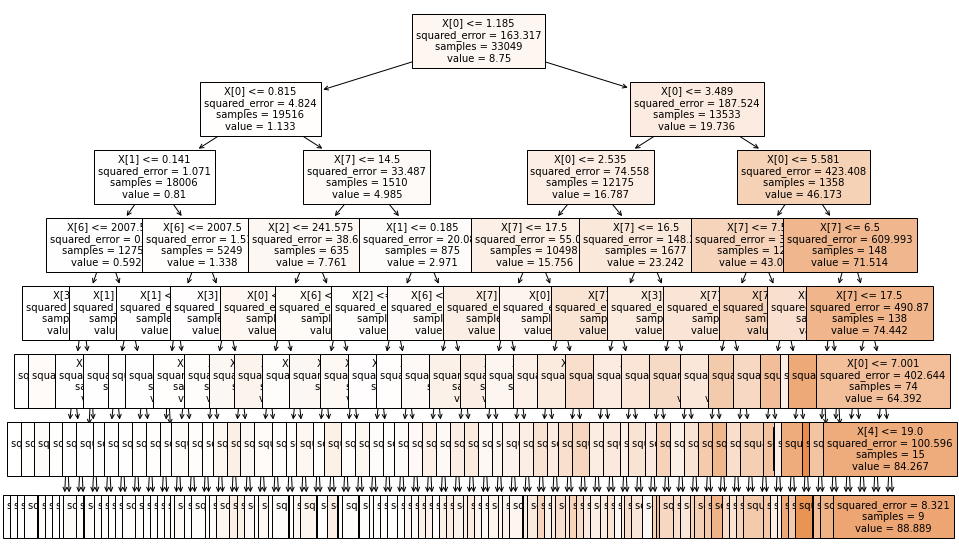

In [52]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
tree.plot_tree(regressor_best_param,filled=True,fontsize=10)